# HW_08 by Andrew Lee

## Which independent variable (either individually or in terms of their interactions) are the best predictors for a high likelihood to visit the food area?


Import Data

In [2]:
# import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('datasets_applied_business_analytics - pricing.csv.csv')
df.set_index("respondent_id", inplace = True)
df.head()

,intent_to_visit,respondent_gender,respondent_age,food_type,beverage_type,atmosphere_type
respondent_id,,,,,,
A1113965,6,1,3,0,0,1
A1131161,7,1,4,1,0,0
A1141748,6,0,4,1,1,1
A1145338,3,0,5,1,1,1
A1145945,7,1,1,0,0,0


In [3]:
col_names = [x for x in df.columns]
poss_output = [df[x].unique() for x in col_names]
for i in range(len(col_names)):
    print(col_names[i]," :", poss_output[i])

intent_to_visit  : [6 7 3 5 2 4 1]
respondent_gender  : [1 0]
respondent_age  : [3 4 5 1 2 6]
food_type  : [0 1]
beverage_type  : [0 1]
atmosphere_type  : [1 0]


- intent_to_visit : dependent variable, desire scale from 1 to 7. [1,2,3,4,5,6,7]
- respondent_gender: independent variable, reponseer gender as binary [1,0]
- respondent_age : independent variable, reponserer age scale from 1 to 6 [1,2,3,4,5,6]
- food_type : independent variable, 2 type of food as binary [1,0]
- beverage_type : independent variable, 2 type of beverage as binary [1,0]
- atmosphere_type : independent variable, 2 type of atmosphere as binary [1,0]

Methodology that I am going to use is ANOVA, since the independent variables are binary/categorical and dependent variable is number.

In [4]:
model = ols('intent_to_visit ~ respondent_gender + respondent_age + food_type + beverage_type + atmosphere_type +\
            respondent_gender*respondent_age +  respondent_gender*food_type + respondent_gender*beverage_type + respondent_gender*atmosphere_type+\
            respondent_age*food_type + respondent_age*beverage_type + respondent_age*atmosphere_type+\
            food_type*beverage_type + food_type*atmosphere_type + beverage_type*atmosphere_type',data=df).fit()

In [6]:
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table = anova_table.applymap('{:.15f}'.format)
print("Fig 1 ANOVA summary table ")
print(anova_table)

Fig 1 ANOVA summary table 
                                                 sum_sq                   df  \
respondent_gender                     0.654475560500593    1.000000000000000   
respondent_age                       14.551188939906822    1.000000000000000   
food_type                             0.176041666666761    1.000000000000000   
beverage_type                        76.501041666665174    1.000000000000000   
atmosphere_type                      17.876041666666197    1.000000000000000   
respondent_gender:respondent_age      1.082012810851970    1.000000000000000   
respondent_gender:food_type          17.387375326624849    1.000000000000000   
respondent_gender:beverage_type       4.292405332753208    1.000000000000000   
respondent_gender:atmosphere_type     0.375528548765700    1.000000000000000   
respondent_age:food_type              0.148691195355685    1.000000000000000   
respondent_age:beverage_type          5.502676055711576    1.000000000000000   
respondent_ag

Assume the significance level is 0.05, base on the ANOVA summary table, beverage_type have the highest F-statisic value (34.88) and statistically significant difference with p-value (0.000000004). 
Atmosphere_type have the second highest F-statisic value (8.15) and statistically significant difference with p-value (0.004). 
Also, respondent_gender and food_type have the high F-statitic value ( 7.92) and statistically significant difference with p-value (0.005) which shows they may have high interaction effect.

### Checking fundamental assumption (beverage_type vs intent_to_visit)

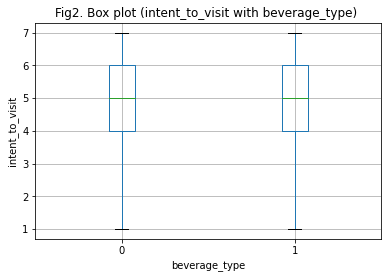

In [38]:
df.boxplot(column='intent_to_visit', by='beverage_type')
plt.xlabel('beverage_type')
plt.ylabel('intent_to_visit')
plt.suptitle("")
plt.title("Fig2. Box plot (intent_to_visit with beverage_type) ")
plt.show()

From Fig2. bervage type 1 and type 2 has similar box-length. These shows the variance of two groups are the same similar. The box is not on the middle of the range. It shows the data may be skewed.

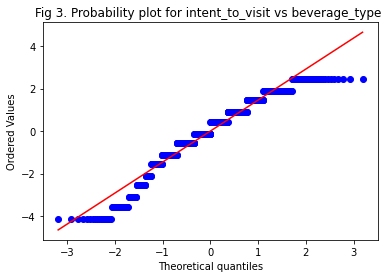

In [37]:
import seaborn as sns
X =df[['beverage_type']]
y=df['intent_to_visit']
model1 = ols("intent_to_visit ~ beverage_type", df).fit()
y_pred = model1.predict(X)
residuals = y - y_pred
# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 3. Probability plot for intent_to_visit vs beverage_type ")
plt.show()

In Fig 3 probability plot, both tails deviate on the same side of the line, which is evidence of skewed data. We can conclude the residuals are sightly not normally distributed.

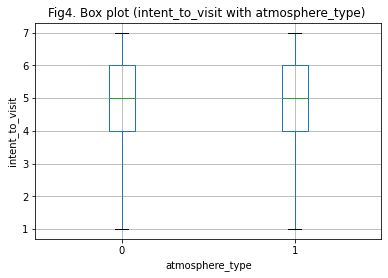

In [40]:
df.boxplot(column='intent_to_visit', by='atmosphere_type')
plt.xlabel('atmosphere_type')
plt.ylabel('intent_to_visit')
plt.suptitle("")
plt.title("Fig4. Box plot (intent_to_visit with atmosphere_type) ")
plt.show()

From Fig4, atmosphere type 1 and type 2 has similar box-length. These shows the variance of two groups are the same similar. The box is not on the middle of the range. It shows the data may be skewed.

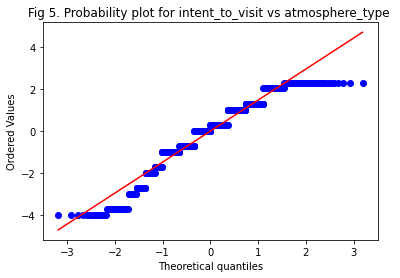

In [41]:
import seaborn as sns
X =df[['atmosphere_type']]
y=df['intent_to_visit']
model1 = ols("intent_to_visit ~ atmosphere_type", df).fit()
y_pred = model1.predict(X)
residuals = y - y_pred
# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 5. Probability plot for intent_to_visit vs atmosphere_type ")
plt.show()

In Fig 5 probability plot, both tails deviate on the same side of the line, which is evidence of skewed data. We can conclude the residuals are sightly not normally distributed.

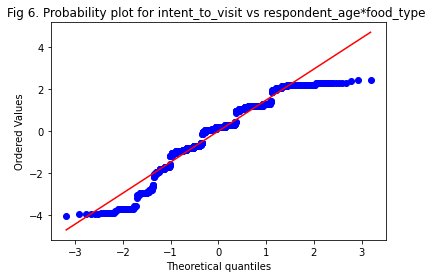

In [50]:
import seaborn as sns
X =df[['food_type','respondent_age']]
y=df['intent_to_visit']
model1 = ols("intent_to_visit ~ respondent_age*food_type", df).fit()
y_pred = model1.predict(X)
residuals = y - y_pred
# Plot the residuals
stats.probplot(residuals, plot=plt)
plt.title("Fig 6. Probability plot for intent_to_visit vs respondent_age*food_type ")
plt.show()

In Fig 6 probability plot, the top tail deviates on the same side of the line, which is evidence of skewed data. We can conclude the residuals are sightly not normally distributed.

### Conclusion

Beverage_type and Atmosphere_type are the best predictors for a high likelihood to visit the food area. There is a strong interaction effect on food_type and respondent_gender. Some potential error is the dataset is slightly skewed.